### Imports ###

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

### Importing, viewing and checking if the data has any missing values ###

In [155]:
df = pd.read_excel('data.xlsx')
df.head()

,Hours,Percentage
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [156]:
df.isnull()

,Hours,Percentage
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [157]:
df

,Hours,Percentage
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


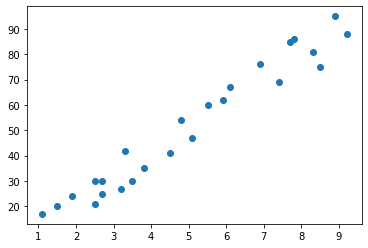

In [158]:
plt.scatter(x = df['Hours'], y = df['Percentage'])
#we see that the variable have a nearly linear relationship

In [159]:
df.columns

Index(['Hours', 'Percentage'], dtype='object')

In [160]:
X = df[['Hours']]
y = df[['Percentage']]

### Training The model ###

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 10)
type(y_test)

pandas.core.frame.DataFrame

In [162]:
reg_model = LinearRegression()
reg_model.fit(X_train,y_train)

LinearRegression()

### Results from the model ###

In [163]:
print(reg_model.intercept_)
print(reg_model.coef_)

[1.21396494]
[[10.06790391]]


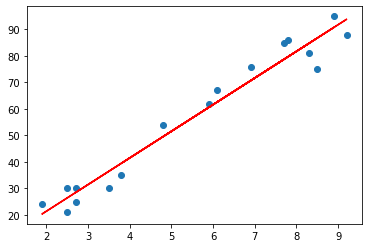

In [164]:
x = np.array(X_train)
y = np.array(y_train)
reg_line = reg_model.intercept_ + x*reg_model.coef_
plt.scatter(x,y)
plt.plot(x,reg_line, 'r')

### Predictions ###

In [165]:
y_pred = reg_model.predict(X_test)

In [183]:
a = y_pred
a = a.flatten()

In [184]:
b = y_test
b = np.array(b)
b = b.flatten()

In [177]:
ans = pd.DataFrame({'Actual':b, 'Predicted':a})
ans

,Actual,Predicted
0,20,16.315821
1,47,52.560275
2,42,34.438048
3,27,33.431257
4,41,46.519533
5,69,75.716454
6,17,12.288659
7,60,56.587436


In [178]:
val = np.array(9.25).reshape((-1,1))
y_predict = reg_model.predict(val)
y_predict

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[94.34207607]])

### Error Metrics ###

In [179]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 5.449694297153993
